In [2]:
import scanpy as sc

/home/haziq/mambaforge/envs/hgsoc/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/home/haziq/mambaforge/envs/hgsoc/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/home/haziq/mambaforge/envs/hgsoc/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
/home/haziq/mambaforge/envs/hgsoc/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/home/haziq/mambaforge/envs/hgsoc/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing 

In [3]:
adata = sc.read_h5ad("./sdvelo_sde_sim.h5ad")

In [4]:
adata.var

,true_t_,true_alpha,true_beta,true_gamma,true_sigma_1,true_sigma_2,true_u0,true_s0,means,dispersions,dispersions_norm,highly_variable,fit_alpha,fit_beta,fit_gamma,fit_t_,fit_sigma_1,fit_sigma_2
0,0.333959,3.704231,8.437979,6.059944,1.532012,1.854493,0.073256,0.040861,0.433969,-1.291617,1.198780,True,4.967741,11.667927,8.002680,0.844530,0.010000,0.017166
1,0.320037,2.499450,3.413932,5.332246,0.638455,1.227428,0.056074,0.062842,0.305772,-1.834254,0.687947,True,1.975498,3.003979,2.252186,0.459525,0.014744,0.010000
2,0.753792,6.795996,6.164132,9.611661,0.103878,1.241969,0.063184,0.022493,0.414180,-1.791572,-0.497276,True,7.686723,6.322368,10.419317,0.709175,0.010000,0.010000
3,0.616448,2.290648,2.323653,10.220876,1.867164,0.500517,0.018094,0.062632,0.213161,-2.509368,-0.298577,True,2.534949,0.649279,0.569428,0.393127,0.012015,0.010000
4,0.274691,3.533597,2.850033,9.500152,0.900510,0.390932,0.049938,0.036183,0.151151,-2.968545,-0.402927,True,2.033328,0.635932,1.348230,0.250671,0.010000,0.010000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.692375,7.646759,8.693445,5.724069,1.531477,0.429885,0.065979,0.042832,0.686538,-1.436247,-1.563391,True,8.108637,7.383034,5.126626,0.649297,0.010000,0.010000
1996,0.393234,2.040539,10.367315,2.850341,0.962934,0.863903,0.064471,0.070188,0.475568,-1.502711,0.037804,True,3.273116,11.567536,3.654362,0.780031,0.015460,0.010919
1997,0.388260,3.781806,4.167866,2.471101,0.973121,1.958800,0.016319,0.025443,0.643257,-0.652212,1.816914,True,5.142276,7.531952,2.749394,0.580429,0.016652,0.010000
1998,0.770953,4.460524,9.233584,2.200876,0.472059,1.460631,0.003939,0.010218,0.803869,-0.767074,0.847282,True,5.998158,12.729216,2.935271,0.732022,0.011869,0.010065


In [5]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the potential model
class PotentialNN(nn.Module):
    def __init__(self, input_dim, hidden_dim=64):
        super(PotentialNN, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, 1)  # Output is scalar potential
        )

    def forward(self, x):
        return self.net(x)

In [6]:
adata

AnnData object with n_obs × n_vars = 2000 × 2000
    obs: 'true_t', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'latent_time', 'sde_velocity_self_transition', 'sde_velocity_length', 'sde_velocity_confidence', 'sde_velocity_confidence_transition'
    var: 'true_t_', 'true_alpha', 'true_beta', 'true_gamma', 'true_sigma_1', 'true_sigma_2', 'true_u0', 'true_s0', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_sigma_1', 'fit_sigma_2'
    uns: 'log1p', 'neighbors', 'pca', 'sde_velocity_graph', 'sde_velocity_graph_neg', 'sde_velocity_params'
    obsm: 'X_pca', 'sde_velocity_pca'
    varm: 'PCs'
    layers: 'Ms', 'Mu', 'pred_s', 'pred_u', 'sde_velocity', 'spliced', 'unspliced'
    obsp: 'connectivities', 'distances'

In [7]:
model = PotentialNN(input_dim=2000)

# adata_sub = adata[:, adata.var["velocity_genes"]]

data_x = torch.Tensor(adata.layers["spliced"])
data_y = torch.Tensor(adata.layers["sde_velocity"])

In [8]:
import torch
from torch.autograd import grad

def compute_gradient(potential, x):
    grad_outputs = torch.ones_like(potential)
    gradients = grad(outputs=potential, inputs=x, grad_outputs=grad_outputs, create_graph=True)[0]
    return gradients

In [16]:
from tqdm import tqdm
import torch.optim as optim

# Set training parameters
epochs = 1000
lr = 1e-5
optimizer = optim.Adam(model.parameters(), lr=lr)

# Ensure gradients can be calculated for input data
data_x.requires_grad_()
data_y.requires_grad_()

# Training loop with tqdm progress bar
for epoch in tqdm(range(epochs), desc="Training Progress"):
    model.train()
    optimizer.zero_grad()

    # Compute potential and gradient
    potentials = model(data_x)
    gradients = compute_gradient(potentials, data_x)

    # Compute loss
    loss = torch.mean((data_y + gradients) ** 2)
    loss.backward()
    optimizer.step()

    # Print loss every 100 epochs
    tqdm.write(f"Epoch {epoch}, Loss: {loss.item()}")


Training Progress:   0%|          | 2/1000 [00:00<02:40,  6.22it/s]

Epoch 0, Loss: 0.00035427583497948945
Epoch 1, Loss: 0.0003542706836014986


Training Progress:   0%|          | 4/1000 [00:00<01:51,  8.93it/s]

Epoch 2, Loss: 0.0003542577032931149
Epoch 3, Loss: 0.00035425962414592505
Epoch 4, Loss: 0.0003542655904311687


Epoch 5, Loss: 0.00035427301190793514
Epoch 6, Loss: 0.0003542788326740265
Epoch 7, Loss: 0.0003542838094290346
Epoch 8, Loss: 0.000354291609255597


Training Progress:   1%|          | 11/1000 [00:01<01:09, 14.13it/s]

Epoch 9, Loss: 0.00035429949639365077
Epoch 10, Loss: 0.0003543036582414061
Epoch 11, Loss: 0.00035431765718385577
Epoch 12, Loss: 0.0003543181228451431


Training Progress:   2%|▏         | 17/1000 [00:01<00:52, 18.65it/s]

Epoch 13, Loss: 0.0003543177735991776
Epoch 14, Loss: 0.0003543419297784567
Epoch 15, Loss: 0.00035435412428341806
Epoch 16, Loss: 0.00035434827441349626
Epoch 17, Loss: 0.0003543448983691633
Epoch 18, Loss: 0.0003543492639437318


Training Progress:   2%|▏         | 23/1000 [00:01<00:45, 21.24it/s]

Epoch 19, Loss: 0.0003543585480656475
Epoch 20, Loss: 0.00035435694735497236
Epoch 21, Loss: 0.000354345072992146
Epoch 22, Loss: 0.000354359537595883
Epoch 23, Loss: 0.0003543647762853652


Training Progress:   3%|▎         | 29/1000 [00:01<00:43, 22.36it/s]

Epoch 24, Loss: 0.00035436591133475304
Epoch 25, Loss: 0.00035436515463516116
Epoch 26, Loss: 0.00035436073085293174
Epoch 27, Loss: 0.0003543609636835754
Epoch 28, Loss: 0.000354359217453748


Training Progress:   3%|▎         | 32/1000 [00:01<00:49, 19.66it/s]

Epoch 29, Loss: 0.0003543691127561033
Epoch 30, Loss: 0.00035439161001704633
Epoch 31, Loss: 0.0003544031351339072
Epoch 32, Loss: 0.00035440773353911936
Epoch 33, Loss: 0.0003544182691257447


Training Progress:   4%|▍         | 38/1000 [00:02<00:45, 20.91it/s]

Epoch 34, Loss: 0.00035443116212263703
Epoch 35, Loss: 0.0003544362261891365
Epoch 36, Loss: 0.00035444245440885425
Epoch 37, Loss: 0.00035445246612653136
Epoch 38, Loss: 0.0003544744395185262


Training Progress:   4%|▍         | 44/1000 [00:02<00:48, 19.81it/s]

Epoch 39, Loss: 0.00035447071422822773
Epoch 40, Loss: 0.0003544640785548836
Epoch 41, Loss: 0.0003544648934621364
Epoch 42, Loss: 0.00035446448600851
Epoch 43, Loss: 0.00035445840330794454


Training Progress:   5%|▍         | 47/1000 [00:02<00:52, 18.30it/s]

Epoch 44, Loss: 0.0003544627397786826
Epoch 45, Loss: 0.00035446020774543285
Epoch 46, Loss: 0.000354478950612247
Epoch 47, Loss: 0.00035448113339953125


Training Progress:   5%|▌         | 53/1000 [00:02<00:47, 20.04it/s]

Epoch 48, Loss: 0.00035449123242869973
Epoch 49, Loss: 0.00035449600545689464
Epoch 50, Loss: 0.0003544979263097048
Epoch 51, Loss: 0.00035449801362119615
Epoch 52, Loss: 0.00035450878203846514


Training Progress:   6%|▌         | 56/1000 [00:03<00:45, 20.55it/s]

Epoch 53, Loss: 0.000354504183633253
Epoch 54, Loss: 0.00035451247822493315
Epoch 55, Loss: 0.0003545138461049646
Epoch 56, Loss: 0.00035451751318760216
Epoch 57, Loss: 0.00035453075543046


Training Progress:   6%|▌         | 62/1000 [00:03<00:44, 21.31it/s]

Epoch 58, Loss: 0.0003545326762832701
Epoch 59, Loss: 0.00035452735028229654
Epoch 60, Loss: 0.0003545178915373981
Epoch 61, Loss: 0.0003545281069818884
Epoch 62, Loss: 0.0003545317449606955


Training Progress:   7%|▋         | 69/1000 [00:03<00:41, 22.26it/s]

Epoch 63, Loss: 0.0003545317449606955
Epoch 64, Loss: 0.00035453561577014625
Epoch 65, Loss: 0.0003545403014868498
Epoch 66, Loss: 0.00035456399200484157
Epoch 67, Loss: 0.00035457542981021106
Epoch 68, Loss: 0.0003545802610460669
Epoch 69, Loss: 0.0003545871877577156


Training Progress:   8%|▊         | 76/1000 [00:03<00:35, 26.30it/s]

Epoch 70, Loss: 0.0003545961226336658
Epoch 71, Loss: 0.0003545983927324414
Epoch 72, Loss: 0.00035460907383821905
Epoch 73, Loss: 0.0003545957733877003
Epoch 74, Loss: 0.0003545886720530689
Epoch 75, Loss: 0.00035460208891890943
Epoch 76, Loss: 0.0003545984218362719


Training Progress:   8%|▊         | 82/1000 [00:04<00:33, 27.50it/s]

Epoch 77, Loss: 0.00035460153594613075
Epoch 78, Loss: 0.0003546105872374028
Epoch 79, Loss: 0.00035459522041492164
Epoch 80, Loss: 0.0003545861109159887
Epoch 81, Loss: 0.0003545867220964283
Epoch 82, Loss: 0.00035458430647850037


Training Progress:   9%|▉         | 88/1000 [00:04<00:35, 25.64it/s]

Epoch 83, Loss: 0.00035456340992823243
Epoch 84, Loss: 0.00035456134355627
Epoch 85, Loss: 0.00035456824116408825
Epoch 86, Loss: 0.0003545614308677614
Epoch 87, Loss: 0.0003545308136381209
Epoch 88, Loss: 0.0003545238287188113


Training Progress:   9%|▉         | 94/1000 [00:04<00:34, 26.40it/s]

Epoch 89, Loss: 0.0003544929204508662
Epoch 90, Loss: 0.00035447179106995463
Epoch 91, Loss: 0.00035443625529296696
Epoch 92, Loss: 0.0003544067731127143
Epoch 93, Loss: 0.00035437243059277534
Epoch 94, Loss: 0.0003543433849699795


Training Progress:  10%|█         | 100/1000 [00:04<00:32, 27.41it/s]

Epoch 95, Loss: 0.00035431142896413803
Epoch 96, Loss: 0.0003542665217537433
Epoch 97, Loss: 0.00035421698703430593
Epoch 98, Loss: 0.0003541631158441305
Epoch 99, Loss: 0.0003541223122738302
Epoch 100, Loss: 0.00035409937845543027


Training Progress:  11%|█         | 106/1000 [00:05<00:34, 25.60it/s]

Epoch 101, Loss: 0.00035405330709181726
Epoch 102, Loss: 0.000354009767761454
Epoch 103, Loss: 0.00035398383624851704
Epoch 104, Loss: 0.00035394428414292634
Epoch 105, Loss: 0.0003539071185514331


Training Progress:  11%|█         | 112/1000 [00:05<00:33, 26.34it/s]

Epoch 106, Loss: 0.0003538642486091703
Epoch 107, Loss: 0.00035383482463657856
Epoch 108, Loss: 0.00035378997563384473
Epoch 109, Loss: 0.00035377751919440925
Epoch 110, Loss: 0.00035372949787415564
Epoch 111, Loss: 0.0003537011507432908


Training Progress:  12%|█▏        | 115/1000 [00:05<00:34, 25.82it/s]

Epoch 112, Loss: 0.00035368272801861167
Epoch 113, Loss: 0.00035365490475669503
Epoch 114, Loss: 0.0003536371514201164
Epoch 115, Loss: 0.00035359858884476125
Epoch 116, Loss: 0.0003535746072884649
Epoch 117, Loss: 0.00035355478757992387


Training Progress:  12%|█▏        | 122/1000 [00:05<00:37, 23.61it/s]

Epoch 118, Loss: 0.0003535184951033443
Epoch 119, Loss: 0.00035348942037671804
Epoch 120, Loss: 0.00035348007804714143
Epoch 121, Loss: 0.0003534653806127608


Training Progress:  13%|█▎        | 128/1000 [00:05<00:34, 25.48it/s]

Epoch 122, Loss: 0.00035345941432751715
Epoch 123, Loss: 0.00035342940827831626
Epoch 124, Loss: 0.0003534160496201366
Epoch 125, Loss: 0.00035341354669071734
Epoch 126, Loss: 0.0003533890121616423
Epoch 127, Loss: 0.000353394279954955


Training Progress:  13%|█▎        | 131/1000 [00:06<00:33, 25.67it/s]

Epoch 128, Loss: 0.0003533826384227723
Epoch 129, Loss: 0.0003533746930770576
Epoch 130, Loss: 0.0003533526905812323
Epoch 131, Loss: 0.0003533372946549207
Epoch 132, Loss: 0.0003533268172759563
Epoch 133, Loss: 0.0003533228882588446
Epoch 134, Loss: 0.0003533185226842761


Training Progress:  14%|█▍        | 141/1000 [00:06<00:30, 27.90it/s]

Epoch 135, Loss: 0.00035330865648575127
Epoch 136, Loss: 0.0003533178532961756
Epoch 137, Loss: 0.0003532975970301777
Epoch 138, Loss: 0.0003532971313688904
Epoch 139, Loss: 0.0003532855771481991
Epoch 140, Loss: 0.0003532855771481991


Training Progress:  15%|█▍        | 147/1000 [00:06<00:33, 25.59it/s]

Epoch 141, Loss: 0.0003532849659677595
Epoch 142, Loss: 0.00035329331876710057
Epoch 143, Loss: 0.0003532904083840549
Epoch 144, Loss: 0.00035331532126292586
Epoch 145, Loss: 0.0003533290873747319
Epoch 146, Loss: 0.0003533288836479187


Training Progress:  15%|█▌        | 150/1000 [00:06<00:33, 25.44it/s]

Epoch 147, Loss: 0.0003533424169290811
Epoch 148, Loss: 0.0003533556591719389
Epoch 149, Loss: 0.00035335938446223736
Epoch 150, Loss: 0.0003533716080710292
Epoch 151, Loss: 0.00035338682937435806
Epoch 152, Loss: 0.0003533842391334474


Training Progress:  16%|█▌        | 157/1000 [00:07<00:30, 27.56it/s]

Epoch 153, Loss: 0.00035339200985617936
Epoch 154, Loss: 0.0003534069110173732
Epoch 155, Loss: 0.0003534176212269813
Epoch 156, Loss: 0.0003534299321472645
Epoch 157, Loss: 0.0003534299321472645
Epoch 158, Loss: 0.0003534413408488035


Training Progress:  16%|█▋        | 163/1000 [00:07<00:33, 24.85it/s]

Epoch 159, Loss: 0.0003534538554958999
Epoch 160, Loss: 0.00035345740616321564
Epoch 161, Loss: 0.00035346992081031203
Epoch 162, Loss: 0.0003534633433446288
Epoch 163, Loss: 0.00035346121876500547


Training Progress:  17%|█▋        | 169/1000 [00:07<00:31, 26.29it/s]

Epoch 164, Loss: 0.00035345408832654357
Epoch 165, Loss: 0.0003534485585987568
Epoch 166, Loss: 0.00035344582283869386
Epoch 167, Loss: 0.00035343202762305737
Epoch 168, Loss: 0.0003534168063197285
Epoch 169, Loss: 0.0003534152638167143


Training Progress:  18%|█▊        | 175/1000 [00:07<00:30, 27.38it/s]

Epoch 170, Loss: 0.0003534126444719732
Epoch 171, Loss: 0.000353398296283558
Epoch 172, Loss: 0.00035339745227247477
Epoch 173, Loss: 0.00035340283648110926
Epoch 174, Loss: 0.00035340411704964936
Epoch 175, Loss: 0.00035340830800123513


Training Progress:  18%|█▊        | 181/1000 [00:07<00:33, 24.27it/s]

Epoch 176, Loss: 0.0003534147108439356
Epoch 177, Loss: 0.00035342591581866145
Epoch 178, Loss: 0.00035341872717253864
Epoch 179, Loss: 0.00035342355840839446
Epoch 180, Loss: 0.000353432958945632


Training Progress:  19%|█▊        | 187/1000 [00:08<00:33, 24.48it/s]

Epoch 181, Loss: 0.0003534347633831203
Epoch 182, Loss: 0.00035344177740626037
Epoch 183, Loss: 0.0003534410789143294
Epoch 184, Loss: 0.0003534466086421162
Epoch 185, Loss: 0.00035344823845662177
Epoch 186, Loss: 0.000353460171027109


Training Progress:  19%|█▉        | 193/1000 [00:08<00:31, 25.77it/s]

Epoch 187, Loss: 0.000353458512108773
Epoch 188, Loss: 0.0003534552815835923
Epoch 189, Loss: 0.00035348045639693737
Epoch 190, Loss: 0.0003534735005814582
Epoch 191, Loss: 0.0003534722200129181
Epoch 192, Loss: 0.0003534716088324785


Training Progress:  20%|█▉        | 196/1000 [00:08<00:31, 25.87it/s]

Epoch 193, Loss: 0.0003534686111379415
Epoch 194, Loss: 0.0003534714924171567
Epoch 195, Loss: 0.0003534645074978471
Epoch 196, Loss: 0.0003534492861945182
Epoch 197, Loss: 0.0003534583083819598


Training Progress:  20%|██        | 202/1000 [00:08<00:33, 23.50it/s]

Epoch 198, Loss: 0.0003534620045684278
Epoch 199, Loss: 0.0003534689894877374
Epoch 200, Loss: 0.00035347402445040643
Epoch 201, Loss: 0.00035347844823263586
Epoch 202, Loss: 0.00035349620156921446
Epoch 203, Loss: 0.000353506940882653


Training Progress:  21%|██        | 208/1000 [00:09<00:32, 24.39it/s]

Epoch 204, Loss: 0.0003535033611115068
Epoch 205, Loss: 0.0003534942225087434
Epoch 206, Loss: 0.00035349727841094136
Epoch 207, Loss: 0.0003535004216246307
Epoch 208, Loss: 0.0003535017021931708
Epoch 209, Loss: 0.0003535047871991992


Training Progress:  21%|██▏       | 214/1000 [00:09<00:30, 26.07it/s]

Epoch 210, Loss: 0.00035350819234736264
Epoch 211, Loss: 0.0003535037103574723
Epoch 212, Loss: 0.0003534879651851952
Epoch 213, Loss: 0.00035348747042007744
Epoch 214, Loss: 0.0003534792922437191
Epoch 215, Loss: 0.0003534715506248176


Training Progress:  22%|██▏       | 220/1000 [00:09<00:32, 23.92it/s]

Epoch 216, Loss: 0.00035347475204616785
Epoch 217, Loss: 0.00035348100936971605
Epoch 218, Loss: 0.00035348342498764396
Epoch 219, Loss: 0.00035347018274478614
Epoch 220, Loss: 0.0003534744319040328
Epoch 221, Loss: 0.0003534630232024938


Training Progress:  23%|██▎       | 226/1000 [00:09<00:30, 25.41it/s]

Epoch 222, Loss: 0.0003534675342962146
Epoch 223, Loss: 0.00035346756340004504
Epoch 224, Loss: 0.00035347352968528867
Epoch 225, Loss: 0.00035346767981536686
Epoch 226, Loss: 0.0003534603165462613
Epoch 227, Loss: 0.00035344986827112734


Training Progress:  23%|██▎       | 232/1000 [00:10<00:31, 24.63it/s]

Epoch 228, Loss: 0.00035343426861800253
Epoch 229, Loss: 0.00035342664341442287
Epoch 230, Loss: 0.000353413779521361
Epoch 231, Loss: 0.0003534130519255996
Epoch 232, Loss: 0.0003534123534336686


Training Progress:  24%|██▍       | 239/1000 [00:10<00:30, 24.77it/s]

Epoch 233, Loss: 0.000353403331246227
Epoch 234, Loss: 0.00035341325565241277
Epoch 235, Loss: 0.0003534020797815174
Epoch 236, Loss: 0.0003534036222845316
Epoch 237, Loss: 0.00035340528120286763
Epoch 238, Loss: 0.0003534182324074209


Training Progress:  24%|██▍       | 242/1000 [00:10<00:29, 25.59it/s]

Epoch 239, Loss: 0.00035342827322892845
Epoch 240, Loss: 0.0003534200950525701
Epoch 241, Loss: 0.00035341805778443813
Epoch 242, Loss: 0.000353424868080765
Epoch 243, Loss: 0.00035342134651727974
Epoch 244, Loss: 0.0003534187562763691


Training Progress:  25%|██▍       | 249/1000 [00:10<00:28, 26.45it/s]

Epoch 245, Loss: 0.0003534111601766199
Epoch 246, Loss: 0.0003533997223712504
Epoch 247, Loss: 0.0003534018178470433
Epoch 248, Loss: 0.0003534024872351438
Epoch 249, Loss: 0.0003534017887432128


Training Progress:  26%|██▌       | 255/1000 [00:10<00:30, 24.39it/s]

Epoch 250, Loss: 0.0003534135175868869
Epoch 251, Loss: 0.00035341468174010515
Epoch 252, Loss: 0.0003534147690515965
Epoch 253, Loss: 0.000353412760887295
Epoch 254, Loss: 0.00035341482725925744
Epoch 255, Loss: 0.0003534093266353011


Training Progress:  26%|██▌       | 261/1000 [00:11<00:29, 25.39it/s]

Epoch 256, Loss: 0.00035341884358786047
Epoch 257, Loss: 0.00035341447801329195
Epoch 258, Loss: 0.00035341436159797013
Epoch 259, Loss: 0.00035340565955266356
Epoch 260, Loss: 0.0003534168063197285
Epoch 261, Loss: 0.0003534173301886767


Training Progress:  27%|██▋       | 267/1000 [00:11<00:27, 26.80it/s]

Epoch 262, Loss: 0.0003534188726916909
Epoch 263, Loss: 0.0003534184070304036
Epoch 264, Loss: 0.0003534154675435275
Epoch 265, Loss: 0.00035341575858183205
Epoch 266, Loss: 0.0003534070565365255
Epoch 267, Loss: 0.00035339940222911537


Training Progress:  27%|██▋       | 273/1000 [00:11<00:29, 24.94it/s]

Epoch 268, Loss: 0.0003533912531565875
Epoch 269, Loss: 0.00035338380257599056
Epoch 270, Loss: 0.00035338327870704234
Epoch 271, Loss: 0.0003533846465870738
Epoch 272, Loss: 0.0003533762937877327
Epoch 273, Loss: 0.00035337600274942815


Training Progress:  28%|██▊       | 279/1000 [00:11<00:28, 25.66it/s]

Epoch 274, Loss: 0.0003533720737323165
Epoch 275, Loss: 0.00035337143344804645
Epoch 276, Loss: 0.0003533807466737926
Epoch 277, Loss: 0.0003533881972543895
Epoch 278, Loss: 0.00035338476300239563
Epoch 279, Loss: 0.00035338333691470325


Training Progress:  28%|██▊       | 285/1000 [00:12<00:28, 25.25it/s]

Epoch 280, Loss: 0.0003533964918460697
Epoch 281, Loss: 0.00035339221358299255
Epoch 282, Loss: 0.00035339247551746666
Epoch 283, Loss: 0.00035341252805665135
Epoch 284, Loss: 0.0003534308052621782
Epoch 285, Loss: 0.00035344372736290097


Training Progress:  29%|██▉       | 291/1000 [00:12<00:29, 24.13it/s]

Epoch 286, Loss: 0.0003534429124556482
Epoch 287, Loss: 0.0003534571442287415
Epoch 288, Loss: 0.0003534567076712847
Epoch 289, Loss: 0.0003534577554091811
Epoch 290, Loss: 0.0003534543211571872
Epoch 291, Loss: 0.0003534623538143933


Training Progress:  30%|██▉       | 297/1000 [00:12<00:29, 24.19it/s]

Epoch 292, Loss: 0.0003534755378495902
Epoch 293, Loss: 0.00035348592791706324
Epoch 294, Loss: 0.0003534905263222754
Epoch 295, Loss: 0.0003534983261488378
Epoch 296, Loss: 0.0003535181167535484


Training Progress:  30%|███       | 303/1000 [00:12<00:27, 25.23it/s]

Epoch 297, Loss: 0.00035353400744497776
Epoch 298, Loss: 0.0003535478317644447
Epoch 299, Loss: 0.00035354067222215235
Epoch 300, Loss: 0.00035353691782802343
Epoch 301, Loss: 0.00035355164436623454
Epoch 302, Loss: 0.0003535518771968782


Training Progress:  31%|███       | 306/1000 [00:13<00:30, 22.95it/s]

Epoch 303, Loss: 0.0003535619471222162
Epoch 304, Loss: 0.0003535623836796731
Epoch 305, Loss: 0.00035356247099116445
Epoch 306, Loss: 0.0003535566502250731
Epoch 307, Loss: 0.00035355606814846396


Training Progress:  31%|███       | 312/1000 [00:13<00:28, 24.47it/s]

Epoch 308, Loss: 0.00035355929867364466
Epoch 309, Loss: 0.0003535529540386051
Epoch 310, Loss: 0.0003535572031978518
Epoch 311, Loss: 0.00035355795989744365
Epoch 312, Loss: 0.0003535600262694061
Epoch 313, Loss: 0.00035356098669581115


Training Progress:  32%|███▏      | 318/1000 [00:13<00:28, 24.20it/s]

Epoch 314, Loss: 0.00035355461295694113
Epoch 315, Loss: 0.00035355103318579495
Epoch 316, Loss: 0.0003535521973390132
Epoch 317, Loss: 0.00035354605643078685
Epoch 318, Loss: 0.00035354436840862036
Epoch 319, Loss: 0.00035354046849533916


Training Progress:  32%|███▏      | 324/1000 [00:13<00:29, 23.06it/s]

Epoch 320, Loss: 0.0003535441355779767
Epoch 321, Loss: 0.00035354349529370666
Epoch 322, Loss: 0.0003535403811838478
Epoch 323, Loss: 0.000353534851456061
Epoch 324, Loss: 0.0003535347932484001


Epoch 325, Loss: 0.0003535294672474265
Epoch 326, Loss: 0.00035353319253772497
Epoch 327, Loss: 0.00035353124258108437
Epoch 328, Loss: 0.00035352809936739504
Epoch 329, Loss: 0.0003535246942192316


Training Progress:  33%|███▎      | 333/1000 [00:14<00:28, 23.82it/s]

Epoch 330, Loss: 0.0003535235009621829
Epoch 331, Loss: 0.00035352742997929454
Epoch 332, Loss: 0.0003535229479894042
Epoch 333, Loss: 0.0003535228024702519
Epoch 334, Loss: 0.0003535206778906286


Training Progress:  34%|███▍      | 339/1000 [00:14<00:27, 23.97it/s]

Epoch 335, Loss: 0.000353516370523721
Epoch 336, Loss: 0.00035351127735339105
Epoch 337, Loss: 0.00035351060796529055
Epoch 338, Loss: 0.00035351887345314026
Epoch 339, Loss: 0.00035353205748833716
Epoch 340, Loss: 0.0003535518771968782


Training Progress:  34%|███▍      | 345/1000 [00:14<00:30, 21.72it/s]

Epoch 341, Loss: 0.00035356308217160404
Epoch 342, Loss: 0.0003535863070283085
Epoch 343, Loss: 0.000353586656274274
Epoch 344, Loss: 0.00035358924651518464
Epoch 345, Loss: 0.0003535989671945572
Epoch 346, Loss: 0.00035361602203920484


Training Progress:  35%|███▌      | 351/1000 [00:15<00:27, 23.53it/s]

Epoch 347, Loss: 0.0003536286239977926
Epoch 348, Loss: 0.0003536299045663327
Epoch 349, Loss: 0.00035363598726689816
Epoch 350, Loss: 0.0003536349395290017
Epoch 351, Loss: 0.0003536370932124555
Epoch 352, Loss: 0.0003536362783052027


Training Progress:  36%|███▌      | 357/1000 [00:15<00:28, 22.48it/s]

Epoch 353, Loss: 0.00035364984069019556
Epoch 354, Loss: 0.0003536499571055174
Epoch 355, Loss: 0.00035364984069019556
Epoch 356, Loss: 0.0003536510921549052
Epoch 357, Loss: 0.00035364634823054075


Training Progress:  36%|███▋      | 363/1000 [00:15<00:26, 23.71it/s]

Epoch 358, Loss: 0.00035364466020837426
Epoch 359, Loss: 0.00035365234361961484
Epoch 360, Loss: 0.0003536455042194575
Epoch 361, Loss: 0.0003536467847879976
Epoch 362, Loss: 0.00035364466020837426
Epoch 363, Loss: 0.00035364681389182806


Training Progress:  37%|███▋      | 369/1000 [00:15<00:26, 24.25it/s]

Epoch 364, Loss: 0.00035364527138881385
Epoch 365, Loss: 0.00035364189534448087
Epoch 366, Loss: 0.0003536453004926443
Epoch 367, Loss: 0.00035364681389182806
Epoch 368, Loss: 0.00035364291397854686
Epoch 369, Loss: 0.0003536389849614352


Training Progress:  37%|███▋      | 372/1000 [00:15<00:25, 24.37it/s]

Epoch 370, Loss: 0.0003536381700541824
Epoch 371, Loss: 0.00035363834467716515
Epoch 372, Loss: 0.000353637762600556
Epoch 373, Loss: 0.0003536397416610271


Training Progress:  38%|███▊      | 378/1000 [00:16<00:26, 23.11it/s]

Epoch 374, Loss: 0.0003536389849614352
Epoch 375, Loss: 0.00035364661016501486
Epoch 376, Loss: 0.00035364896757528186
Epoch 377, Loss: 0.0003536489384714514
Epoch 378, Loss: 0.00035364856012165546
Epoch 379, Loss: 0.0003536488220561296


Training Progress:  38%|███▊      | 384/1000 [00:16<00:25, 23.72it/s]

Epoch 380, Loss: 0.00035364885115996003
Epoch 381, Loss: 0.00035364695941098034
Epoch 382, Loss: 0.0003536460571922362
Epoch 383, Loss: 0.0003536440199241042
Epoch 384, Loss: 0.00035364209907129407
Epoch 385, Loss: 0.00035363860661163926


Training Progress:  39%|███▉      | 390/1000 [00:16<00:25, 24.33it/s]

Epoch 386, Loss: 0.0003536443109624088
Epoch 387, Loss: 0.0003536393924150616
Epoch 388, Loss: 0.0003536414005793631
Epoch 389, Loss: 0.00035364172072149813


Training Progress:  40%|███▉      | 396/1000 [00:16<00:25, 23.50it/s]

Epoch 390, Loss: 0.0003536440199241042
Epoch 391, Loss: 0.00035364003269933164
Epoch 392, Loss: 0.0003536435542628169
Epoch 393, Loss: 0.0003536480071488768
Epoch 394, Loss: 0.00035364922950975597
Epoch 395, Loss: 0.00035365152871236205


Training Progress:  40%|████      | 402/1000 [00:17<00:23, 25.18it/s]

Epoch 396, Loss: 0.00035365307121537626
Epoch 397, Loss: 0.0003536500735208392
Epoch 398, Loss: 0.0003536484146025032
Epoch 399, Loss: 0.00035364387440495193
Epoch 400, Loss: 0.000353649869794026
Epoch 401, Loss: 0.00035364856012165546


Training Progress:  40%|████      | 405/1000 [00:17<00:24, 24.54it/s]

Epoch 402, Loss: 0.0003536492586135864
Epoch 403, Loss: 0.00035364727955311537
Epoch 404, Loss: 0.0003536489384714514
Epoch 405, Loss: 0.00035364690120331943
Epoch 406, Loss: 0.00035365106305107474


Training Progress:  41%|████      | 411/1000 [00:17<00:27, 21.29it/s]

Epoch 407, Loss: 0.00035365219810046256
Epoch 408, Loss: 0.0003536533040460199
Epoch 409, Loss: 0.0003536509466357529
Epoch 410, Loss: 0.00035364681389182806
Epoch 411, Loss: 0.000353641458787024
Epoch 412, Loss: 0.00035363901406526566


Training Progress:  42%|████▏     | 417/1000 [00:17<00:24, 23.43it/s]

Epoch 413, Loss: 0.00035363598726689816
Epoch 414, Loss: 0.00035363409551791847
Epoch 415, Loss: 0.00035363156348466873
Epoch 416, Loss: 0.00035362763446755707
Epoch 417, Loss: 0.0003536249860189855
Epoch 418, Loss: 0.00035362178459763527


Training Progress:  42%|████▏     | 423/1000 [00:18<00:23, 24.69it/s]

Epoch 419, Loss: 0.00035362053313292563
Epoch 420, Loss: 0.00035361992195248604
Epoch 421, Loss: 0.00035361602203920484
Epoch 422, Loss: 0.0003536125586833805
Epoch 423, Loss: 0.0003536101430654526
Epoch 424, Loss: 0.0003536076401360333


Training Progress:  43%|████▎     | 429/1000 [00:18<00:25, 22.21it/s]

Epoch 425, Loss: 0.000353605835698545
Epoch 426, Loss: 0.00035360382753424346
Epoch 427, Loss: 0.00035360330366529524
Epoch 428, Loss: 0.00035360001493245363
Epoch 429, Loss: 0.0003535970172379166


Training Progress:  44%|████▎     | 435/1000 [00:18<00:23, 24.11it/s]

Epoch 430, Loss: 0.00035359550383873284
Epoch 431, Loss: 0.00035359623143449426
Epoch 432, Loss: 0.000353595387423411
Epoch 433, Loss: 0.0003535945725161582
Epoch 434, Loss: 0.0003535921568982303
Epoch 435, Loss: 0.00035359032335691154


Training Progress:  44%|████▍     | 441/1000 [00:18<00:22, 24.94it/s]

Epoch 436, Loss: 0.00035358843160793185
Epoch 437, Loss: 0.000353591371094808
Epoch 438, Loss: 0.00035358790773898363
Epoch 439, Loss: 0.0003535853757057339
Epoch 440, Loss: 0.0003535838914103806


Training Progress:  44%|████▍     | 444/1000 [00:19<00:26, 20.95it/s]

Epoch 441, Loss: 0.00035358211607672274
Epoch 442, Loss: 0.00035358098102733493
Epoch 443, Loss: 0.00035357908927835524
Epoch 444, Loss: 0.0003535771102178842
Epoch 445, Loss: 0.00035357585875317454


Training Progress:  45%|████▌     | 450/1000 [00:19<00:24, 22.66it/s]

Epoch 446, Loss: 0.0003535740834195167
Epoch 447, Loss: 0.00035357227898202837
Epoch 448, Loss: 0.0003535717842169106
Epoch 449, Loss: 0.000353568815626204
Epoch 450, Loss: 0.0003535660507623106


Training Progress:  46%|████▌     | 456/1000 [00:19<00:22, 23.96it/s]

Epoch 451, Loss: 0.00035356395528651774
Epoch 452, Loss: 0.00035356153966858983
Epoch 453, Loss: 0.00035356078296899796
Epoch 454, Loss: 0.0003535610157996416
Epoch 455, Loss: 0.00035355871659703553
Epoch 456, Loss: 0.0003535572031978518


Training Progress:  46%|████▌     | 459/1000 [00:19<00:25, 21.00it/s]

Epoch 457, Loss: 0.00035355472937226295
Epoch 458, Loss: 0.0003535524883773178
Epoch 459, Loss: 0.0003535520227160305
Epoch 460, Loss: 0.00035355010186322033


Training Progress:  46%|████▋     | 465/1000 [00:19<00:24, 21.99it/s]

Epoch 461, Loss: 0.000353548297425732
Epoch 462, Loss: 0.00035354666761122644
Epoch 463, Loss: 0.00035354431020095944
Epoch 464, Loss: 0.0003535416326485574
Epoch 465, Loss: 0.0003535416326485574
Epoch 466, Loss: 0.0003535390133038163


Training Progress:  47%|████▋     | 471/1000 [00:20<00:22, 23.71it/s]

Epoch 467, Loss: 0.00035353892599232495
Epoch 468, Loss: 0.0003535378782544285
Epoch 469, Loss: 0.00035353729617781937
Epoch 470, Loss: 0.0003535354626365006
Epoch 471, Loss: 0.00035353394923731685
Epoch 472, Loss: 0.0003535329597070813


Training Progress:  48%|████▊     | 477/1000 [00:20<00:24, 21.13it/s]

Epoch 473, Loss: 0.0003535299620125443
Epoch 474, Loss: 0.000353528477717191
Epoch 475, Loss: 0.0003535275172907859
Epoch 476, Loss: 0.00035352722625248134


Training Progress:  48%|████▊     | 483/1000 [00:20<00:22, 23.32it/s]

Epoch 477, Loss: 0.000353524781530723
Epoch 478, Loss: 0.0003535229479894042
Epoch 479, Loss: 0.00035352306440472603
Epoch 480, Loss: 0.0003535217547323555
Epoch 481, Loss: 0.0003535218711476773
Epoch 482, Loss: 0.0003535205905791372


Training Progress:  49%|████▊     | 486/1000 [00:20<00:22, 23.30it/s]

Epoch 483, Loss: 0.000353519368218258
Epoch 484, Loss: 0.0003535184951033443
Epoch 485, Loss: 0.00035351779661141336
Epoch 486, Loss: 0.00035351625410839915
Epoch 487, Loss: 0.00035351651604287326


Training Progress:  49%|████▉     | 492/1000 [00:21<00:20, 24.46it/s]

Epoch 488, Loss: 0.00035351645783521235
Epoch 489, Loss: 0.00035351619590073824
Epoch 490, Loss: 0.00035351578844711185
Epoch 491, Loss: 0.0003535145369824022
Epoch 492, Loss: 0.00035351296537555754
Epoch 493, Loss: 0.00035351357655599713


Training Progress:  50%|████▉     | 498/1000 [00:21<00:22, 22.39it/s]

Epoch 494, Loss: 0.00035351241240277886
Epoch 495, Loss: 0.00035351142287254333
Epoch 496, Loss: 0.00035351127735339105
Epoch 497, Loss: 0.0003535115101840347
Epoch 498, Loss: 0.000353510637069121


Training Progress:  50%|█████     | 504/1000 [00:21<00:20, 24.09it/s]

Epoch 499, Loss: 0.0003535092400852591
Epoch 500, Loss: 0.0003535087453201413
Epoch 501, Loss: 0.00035350891994312406
Epoch 502, Loss: 0.00035350967664271593
Epoch 503, Loss: 0.000353508279658854
Epoch 504, Loss: 0.0003535064170137048


Training Progress:  51%|█████     | 510/1000 [00:21<00:20, 23.64it/s]

Epoch 505, Loss: 0.0003535049327183515
Epoch 506, Loss: 0.00035350362304598093
Epoch 507, Loss: 0.0003535024879965931
Epoch 508, Loss: 0.0003535010910127312
Epoch 509, Loss: 0.00035349969402886927
Epoch 510, Loss: 0.0003535011492203921


Training Progress:  51%|█████▏    | 513/1000 [00:22<00:23, 20.77it/s]

Epoch 511, Loss: 0.0003535017604008317
Epoch 512, Loss: 0.00035350112011656165
Epoch 513, Loss: 0.0003534988791216165
Epoch 514, Loss: 0.00035349742393009365


Training Progress:  52%|█████▏    | 519/1000 [00:22<00:20, 23.26it/s]

Epoch 515, Loss: 0.0003534987918101251
Epoch 516, Loss: 0.00035349794779904187
Epoch 517, Loss: 0.00035349695826880634
Epoch 518, Loss: 0.0003534961142577231
Epoch 519, Loss: 0.0003534967254381627
Epoch 520, Loss: 0.00035349471727386117


Training Progress:  52%|█████▎    | 525/1000 [00:22<00:21, 22.29it/s]

Epoch 521, Loss: 0.00035349628888070583
Epoch 522, Loss: 0.000353496172465384
Epoch 523, Loss: 0.000353495852323249
Epoch 524, Loss: 0.0003534959687385708
Epoch 525, Loss: 0.0003534955030772835


Training Progress:  53%|█████▎    | 528/1000 [00:22<00:20, 22.49it/s]

Epoch 526, Loss: 0.0003534948918968439
Epoch 527, Loss: 0.00035349439713172615
Epoch 528, Loss: 0.0003534932329785079
Epoch 529, Loss: 0.00035349305835552514


Training Progress:  53%|█████▎    | 534/1000 [00:23<00:21, 21.96it/s]

Epoch 530, Loss: 0.0003534925344865769
Epoch 531, Loss: 0.00035349163226783276
Epoch 532, Loss: 0.0003534939605742693
Epoch 533, Loss: 0.00035349567770026624
Epoch 534, Loss: 0.00035349512472748756
Epoch 535, Loss: 0.00035349486279301345


Training Progress:  54%|█████▍    | 540/1000 [00:23<00:20, 22.78it/s]

Epoch 536, Loss: 0.00035349465906620026
Epoch 537, Loss: 0.0003534941060934216
Epoch 538, Loss: 0.00035349305835552514
Epoch 539, Loss: 0.0003534928255248815
Epoch 540, Loss: 0.00035349198151379824


Training Progress:  55%|█████▍    | 546/1000 [00:23<00:19, 22.90it/s]

Epoch 541, Loss: 0.0003534919233061373
Epoch 542, Loss: 0.00035349131212569773
Epoch 543, Loss: 0.0003534903225954622
Epoch 544, Loss: 0.00035348968231119215
Epoch 545, Loss: 0.00035348813980817795


Training Progress:  55%|█████▍    | 549/1000 [00:23<00:22, 20.37it/s]

Epoch 546, Loss: 0.0003534894494805485
Epoch 547, Loss: 0.0003534898569341749
Epoch 548, Loss: 0.00035348982783034444
Epoch 549, Loss: 0.00035348854726180434
Epoch 550, Loss: 0.000353487761458382
Epoch 551, Loss: 0.00035348720848560333


Training Progress:  56%|█████▌    | 555/1000 [00:23<00:18, 23.56it/s]

Epoch 552, Loss: 0.00035348653909750283
Epoch 553, Loss: 0.00035348624805919826
Epoch 554, Loss: 0.0003534852294251323
Epoch 555, Loss: 0.00035348450182937086
Epoch 556, Loss: 0.0003534846182446927
Epoch 557, Loss: 0.000353483046637848


Training Progress:  56%|█████▌    | 562/1000 [00:24<00:17, 25.25it/s]

Epoch 558, Loss: 0.0003534824645612389
Epoch 559, Loss: 0.00035348153323866427
Epoch 560, Loss: 0.00035348045639693737
Epoch 561, Loss: 0.0003534798161126673
Epoch 562, Loss: 0.00035347777884453535
Epoch 563, Loss: 0.00035347710945643485


Training Progress:  57%|█████▋    | 568/1000 [00:24<00:19, 22.51it/s]

Epoch 564, Loss: 0.00035347568336874247
Epoch 565, Loss: 0.00035347489756532013
Epoch 566, Loss: 0.000353474315488711
Epoch 567, Loss: 0.00035347332595847547
Epoch 568, Loss: 0.0003534737625159323


Training Progress:  57%|█████▋    | 574/1000 [00:24<00:18, 22.58it/s]

Epoch 569, Loss: 0.00035347198718227446
Epoch 570, Loss: 0.0003534711431711912
Epoch 571, Loss: 0.0003534702700562775
Epoch 572, Loss: 0.00035346875665709376
Epoch 573, Loss: 0.00035346817458048463


Training Progress:  58%|█████▊    | 580/1000 [00:24<00:17, 23.98it/s]

Epoch 574, Loss: 0.00035346817458048463
Epoch 575, Loss: 0.00035346721415407956
Epoch 576, Loss: 0.000353465584339574
Epoch 577, Loss: 0.0003534647112246603
Epoch 578, Loss: 0.00035346392542123795
Epoch 579, Loss: 0.00035346433287486434


Epoch 580, Loss: 0.00035346386721357703
Epoch 581, Loss: 0.00035346433287486434
Epoch 582, Loss: 0.00035346357617527246
Epoch 583, Loss: 0.0003534634888637811


Training Progress:  59%|█████▉    | 589/1000 [00:25<00:17, 23.72it/s]

Epoch 584, Loss: 0.0003534627321641892
Epoch 585, Loss: 0.00035346372169442475
Epoch 586, Loss: 0.00035346212098374963
Epoch 587, Loss: 0.00035346217919141054
Epoch 588, Loss: 0.00035346069489605725
Epoch 589, Loss: 0.0003534587740432471


Training Progress:  60%|█████▉    | 595/1000 [00:25<00:16, 24.14it/s]

Epoch 590, Loss: 0.00035345848300494254
Epoch 591, Loss: 0.00035345819196663797
Epoch 592, Loss: 0.0003534576972015202
Epoch 593, Loss: 0.00035345746437087655
Epoch 594, Loss: 0.00035345787182450294
Epoch 595, Loss: 0.0003534575516823679


Training Progress:  60%|█████▉    | 598/1000 [00:25<00:16, 24.31it/s]

Epoch 596, Loss: 0.0003534570278134197
Epoch 597, Loss: 0.00035345624200999737
Epoch 598, Loss: 0.00035345545620657504
Epoch 599, Loss: 0.000353454815922305


Training Progress:  60%|██████    | 604/1000 [00:26<00:18, 21.44it/s]

Epoch 600, Loss: 0.0003534539428073913
Epoch 601, Loss: 0.00035345397191122174
Epoch 602, Loss: 0.0003534532443154603
Epoch 603, Loss: 0.00035345248761586845
Epoch 604, Loss: 0.0003534517309162766


Training Progress:  61%|██████    | 610/1000 [00:26<00:16, 23.14it/s]

Epoch 605, Loss: 0.0003534512943588197
Epoch 606, Loss: 0.0003534506540745497
Epoch 607, Loss: 0.00035344992647878826
Epoch 608, Loss: 0.00035344960633665323
Epoch 609, Loss: 0.000353449082467705
Epoch 610, Loss: 0.00035344946081750095


Training Progress:  62%|██████▏   | 616/1000 [00:26<00:15, 24.09it/s]

Epoch 611, Loss: 0.0003534486168064177
Epoch 612, Loss: 0.0003534483548719436
Epoch 613, Loss: 0.00035344684147275984
Epoch 614, Loss: 0.00035344684147275984
Epoch 615, Loss: 0.00035344649222679436


Training Progress:  62%|██████▏   | 619/1000 [00:26<00:17, 21.39it/s]

Epoch 616, Loss: 0.00035344602656550705
Epoch 617, Loss: 0.0003534454735927284
Epoch 618, Loss: 0.0003534439019858837
Epoch 619, Loss: 0.00035344489151611924


Training Progress:  62%|██████▎   | 625/1000 [00:26<00:16, 22.36it/s]

Epoch 620, Loss: 0.00035344433854334056
Epoch 621, Loss: 0.0003534443967510015
Epoch 622, Loss: 0.0003534473362378776
Epoch 623, Loss: 0.00035344448406249285
Epoch 624, Loss: 0.00035344366915524006
Epoch 625, Loss: 0.00035344285424798727


Training Progress:  63%|██████▎   | 631/1000 [00:27<00:15, 23.68it/s]

Epoch 626, Loss: 0.0003534429706633091
Epoch 627, Loss: 0.0003534426505211741
Epoch 628, Loss: 0.0003534419520292431
Epoch 629, Loss: 0.00035344131174497306
Epoch 630, Loss: 0.00035344070056453347
Epoch 631, Loss: 0.00035344038042239845


Training Progress:  64%|██████▎   | 637/1000 [00:27<00:14, 24.58it/s]

Epoch 632, Loss: 0.00035344023490324616
Epoch 633, Loss: 0.00035344003117643297
Epoch 634, Loss: 0.00035343971103429794
Epoch 635, Loss: 0.00035344078787602484
Epoch 636, Loss: 0.0003534402057994157


Training Progress:  64%|██████▍   | 643/1000 [00:27<00:15, 22.94it/s]

Epoch 637, Loss: 0.00035343982744961977
Epoch 638, Loss: 0.0003534394782036543
Epoch 639, Loss: 0.000353439332684502
Epoch 640, Loss: 0.00035343883791938424
Epoch 641, Loss: 0.0003534406132530421
Epoch 642, Loss: 0.0003534402931109071


Training Progress:  65%|██████▍   | 649/1000 [00:27<00:14, 23.91it/s]

Epoch 643, Loss: 0.0003534397401381284
Epoch 644, Loss: 0.00035343950730748475
Epoch 645, Loss: 0.00035344099160283804
Epoch 646, Loss: 0.00035344038042239845
Epoch 647, Loss: 0.000353440671460703
Epoch 648, Loss: 0.00035344052594155073


Training Progress:  65%|██████▌   | 652/1000 [00:28<00:14, 24.07it/s]

Epoch 649, Loss: 0.00035344166099093854
Epoch 650, Loss: 0.00035344119532965124
Epoch 651, Loss: 0.0003534408169798553
Epoch 652, Loss: 0.00035344212665222585


Training Progress:  66%|██████▌   | 658/1000 [00:28<00:15, 22.63it/s]

Epoch 653, Loss: 0.0003534417483024299
Epoch 654, Loss: 0.0003534416318871081
Epoch 655, Loss: 0.0003534418938215822
Epoch 656, Loss: 0.0003534418356139213
Epoch 657, Loss: 0.0003534464631229639
Epoch 658, Loss: 0.00035344617208465934


Training Progress:  66%|██████▋   | 664/1000 [00:28<00:13, 24.15it/s]

Epoch 659, Loss: 0.0003534456773195416
Epoch 660, Loss: 0.00035344550269655883
Epoch 661, Loss: 0.0003534494899213314
Epoch 662, Loss: 0.0003534495772328228
Epoch 663, Loss: 0.00035344899515621364
Epoch 664, Loss: 0.00035344919888302684


Training Progress:  67%|██████▋   | 667/1000 [00:28<00:14, 22.56it/s]

Epoch 665, Loss: 0.00035344890784472227
Epoch 666, Loss: 0.00035344884963706136
Epoch 667, Loss: 0.00035344832576811314
Epoch 668, Loss: 0.0003534482966642827


Training Progress:  67%|██████▋   | 673/1000 [00:29<00:15, 21.14it/s]

Epoch 669, Loss: 0.000353448063833639
Epoch 670, Loss: 0.00035344803472980857
Epoch 671, Loss: 0.00035344751086086035
Epoch 672, Loss: 0.00035344724892638624
Epoch 673, Loss: 0.00035344684147275984


Training Progress:  68%|██████▊   | 679/1000 [00:29<00:13, 23.32it/s]

Epoch 674, Loss: 0.00035344649222679436
Epoch 675, Loss: 0.00035344628849998116
Epoch 676, Loss: 0.0003534457355272025
Epoch 677, Loss: 0.00035344529896974564
Epoch 678, Loss: 0.0003534458519425243
Epoch 679, Loss: 0.000353445066139102


Epoch 680, Loss: 0.00035344462958164513
Epoch 681, Loss: 0.0003534439892973751
Epoch 682, Loss: 0.0003534432325977832
Epoch 683, Loss: 0.00035344119532965124
Epoch 684, Loss: 0.0003534404968377203
Epoch 685, Loss: 0.0003534404968377203


Training Progress:  69%|██████▉   | 691/1000 [00:29<00:13, 22.77it/s]

Epoch 686, Loss: 0.00035344038042239845
Epoch 687, Loss: 0.00035343877971172333
Epoch 688, Loss: 0.0003534394782036543
Epoch 689, Loss: 0.00035343924537301064
Epoch 690, Loss: 0.00035343915806151927
Epoch 691, Loss: 0.00035343915806151927


Epoch 692, Loss: 0.00035343828494660556
Epoch 693, Loss: 0.0003534385468810797
Epoch 694, Loss: 0.0003534381976351142
Epoch 695, Loss: 0.000353437993908301
Epoch 696, Loss: 0.00035343808121979237


Training Progress:  70%|███████   | 700/1000 [00:30<00:12, 23.45it/s]

Epoch 697, Loss: 0.0003534376446623355
Epoch 698, Loss: 0.0003534376446623355
Epoch 699, Loss: 0.00035343802301213145
Epoch 700, Loss: 0.00035343796480447054
Epoch 701, Loss: 0.0003534379357006401
Epoch 702, Loss: 0.00035343761555850506


Epoch 703, Loss: 0.0003534373245202005
Epoch 704, Loss: 0.0003534368588589132
Epoch 705, Loss: 0.00035343601484782994
Epoch 706, Loss: 0.0003534354909788817
Epoch 707, Loss: 0.0003534352290444076


Training Progress:  71%|███████   | 712/1000 [00:30<00:12, 23.30it/s]

Epoch 708, Loss: 0.00035343493800610304
Epoch 709, Loss: 0.00035343412309885025
Epoch 710, Loss: 0.00035343365743756294
Epoch 711, Loss: 0.000353433279087767
Epoch 712, Loss: 0.00035343269701115787
Epoch 713, Loss: 0.00035343243507668376


Training Progress:  72%|███████▏  | 718/1000 [00:31<00:11, 23.66it/s]

Epoch 714, Loss: 0.0003534311836119741
Epoch 715, Loss: 0.0003534307761583477
Epoch 716, Loss: 0.00035343083436600864
Epoch 717, Loss: 0.00035343048512004316
Epoch 718, Loss: 0.0003534303104970604


Training Progress:  72%|███████▏  | 721/1000 [00:31<00:11, 23.25it/s]

Epoch 719, Loss: 0.00035343074705451727
Epoch 720, Loss: 0.00035343074705451727
Epoch 721, Loss: 0.0003534307179506868


Training Progress:  72%|███████▏  | 721/1000 [00:31<00:11, 23.25it/s]

Epoch 722, Loss: 0.00035343042691238225


Training Progress:  72%|███████▏  | 724/1000 [00:31<00:23, 11.87it/s]

Epoch 723, Loss: 0.00035343022318556905
Epoch 724, Loss: 0.000353428564267233


Training Progress:  73%|███████▎  | 729/1000 [00:32<00:20, 13.37it/s]

Epoch 725, Loss: 0.0003534283896442503
Epoch 726, Loss: 0.00035342780756764114
Epoch 727, Loss: 0.0003534274874255061
Epoch 728, Loss: 0.0003534272836986929
Epoch 729, Loss: 0.00035342908813618124


Training Progress:  74%|███████▎  | 735/1000 [00:32<00:14, 18.05it/s]

Epoch 730, Loss: 0.0003534281568136066
Epoch 731, Loss: 0.00035342766204848886
Epoch 732, Loss: 0.0003534267016220838
Epoch 733, Loss: 0.0003534261486493051
Epoch 734, Loss: 0.00035342597402632236
Epoch 735, Loss: 0.00035342780756764114


Training Progress:  74%|███████▍  | 738/1000 [00:32<00:14, 17.68it/s]

Epoch 736, Loss: 0.000353427225491032
Epoch 737, Loss: 0.00035342684714123607
Epoch 738, Loss: 0.0003534273128025234
Epoch 739, Loss: 0.0003534271672833711


Training Progress:  74%|███████▍  | 744/1000 [00:32<00:12, 20.32it/s]

Epoch 740, Loss: 0.00035342606133781374
Epoch 741, Loss: 0.0003534254210535437
Epoch 742, Loss: 0.00035342478076927364
Epoch 743, Loss: 0.00035342402406968176
Epoch 744, Loss: 0.0003534237912390381


Training Progress:  75%|███████▌  | 750/1000 [00:32<00:11, 20.87it/s]

Epoch 745, Loss: 0.0003534228017088026
Epoch 746, Loss: 0.00035342221963219345
Epoch 747, Loss: 0.0003534216375555843
Epoch 748, Loss: 0.00035342108458280563
Epoch 749, Loss: 0.00035342067712917924


Training Progress:  75%|███████▌  | 753/1000 [00:33<00:11, 20.87it/s]

Epoch 750, Loss: 0.0003534200368449092
Epoch 751, Loss: 0.00035341919283382595
Epoch 752, Loss: 0.00035341893089935184
Epoch 753, Loss: 0.0003534186107572168
Epoch 754, Loss: 0.00035341811599209905


Training Progress:  76%|███████▌  | 759/1000 [00:33<00:11, 20.22it/s]

Epoch 755, Loss: 0.00035341735929250717
Epoch 756, Loss: 0.0003534172137733549
Epoch 757, Loss: 0.0003534167190082371
Epoch 758, Loss: 0.0003534155257511884


Training Progress:  76%|███████▌  | 762/1000 [00:33<00:12, 19.11it/s]

Epoch 759, Loss: 0.00035341473994776607
Epoch 760, Loss: 0.00035341540933586657
Epoch 761, Loss: 0.00035341468174010515
Epoch 762, Loss: 0.0003534136340022087


Training Progress:  77%|███████▋  | 768/1000 [00:33<00:10, 21.92it/s]

Epoch 763, Loss: 0.0003534142451826483
Epoch 764, Loss: 0.00035341354669071734
Epoch 765, Loss: 0.00035341252805665135
Epoch 766, Loss: 0.00035341206239536405
Epoch 767, Loss: 0.00035341104376129806


Training Progress:  77%|███████▋  | 774/1000 [00:34<00:09, 23.53it/s]

Epoch 768, Loss: 0.0003534108691383153
Epoch 769, Loss: 0.00035341022885404527
Epoch 770, Loss: 0.00035341022885404527
Epoch 771, Loss: 0.00035340929753147066
Epoch 772, Loss: 0.0003534085117280483
Epoch 773, Loss: 0.00035340714384801686


Training Progress:  78%|███████▊  | 777/1000 [00:34<00:10, 20.90it/s]

Epoch 774, Loss: 0.0003534065035637468
Epoch 775, Loss: 0.0003534058341756463
Epoch 776, Loss: 0.000353404029738158
Epoch 777, Loss: 0.00035340417525731027
Epoch 778, Loss: 0.0003534036222845316


Training Progress:  78%|███████▊  | 783/1000 [00:34<00:09, 22.96it/s]

Epoch 779, Loss: 0.0003534031566232443
Epoch 780, Loss: 0.00035340272006578743
Epoch 781, Loss: 0.00035340184695087373
Epoch 782, Loss: 0.0003534014686010778
Epoch 783, Loss: 0.00035340062458999455
Epoch 784, Loss: 0.00035340007161721587


Training Progress:  79%|███████▉  | 789/1000 [00:34<00:09, 23.35it/s]

Epoch 785, Loss: 0.00035339948954060674
Epoch 786, Loss: 0.0003533985873218626
Epoch 787, Loss: 0.00035339841269887984
Epoch 788, Loss: 0.0003533977724146098
Epoch 789, Loss: 0.0003533978888299316


Training Progress:  79%|███████▉  | 792/1000 [00:34<00:09, 21.65it/s]

Epoch 790, Loss: 0.000353397277649492
Epoch 791, Loss: 0.0003533961426001042
Epoch 792, Loss: 0.00035339637543074787
Epoch 793, Loss: 0.00035339544410817325


Training Progress:  80%|███████▉  | 798/1000 [00:35<00:08, 22.47it/s]

Epoch 794, Loss: 0.00035339509486220777
Epoch 795, Loss: 0.0003533933195285499
Epoch 796, Loss: 0.00035339215537533164
Epoch 797, Loss: 0.00035339241730980575
Epoch 798, Loss: 0.00035339128226041794


Training Progress:  80%|████████  | 804/1000 [00:35<00:08, 22.93it/s]

Epoch 799, Loss: 0.0003533903509378433
Epoch 800, Loss: 0.000353389885276556
Epoch 801, Loss: 0.00035339026362635195
Epoch 802, Loss: 0.00035339026362635195
Epoch 803, Loss: 0.0003533894778229296


Training Progress:  81%|████████  | 807/1000 [00:35<00:08, 23.29it/s]

Epoch 804, Loss: 0.00035338837187737226
Epoch 805, Loss: 0.00035338778980076313
Epoch 806, Loss: 0.00035338749876245856
Epoch 807, Loss: 0.0003533883427735418
Epoch 808, Loss: 0.0003533893614076078


Training Progress:  81%|████████▏ | 813/1000 [00:35<00:08, 20.99it/s]

Epoch 809, Loss: 0.0003533890121616423
Epoch 810, Loss: 0.00035338831366971135
Epoch 811, Loss: 0.0003533870039973408
Epoch 812, Loss: 0.0003533868584781885


Training Progress:  82%|████████▏ | 816/1000 [00:36<00:08, 20.84it/s]

Epoch 813, Loss: 0.0003533860435709357
Epoch 814, Loss: 0.00035338476300239563
Epoch 815, Loss: 0.00035338368616066873
Epoch 816, Loss: 0.0003533832204993814
Epoch 817, Loss: 0.0003533822891768068


Training Progress:  82%|████████▏ | 822/1000 [00:36<00:08, 20.75it/s]

Epoch 818, Loss: 0.00035338246379978955
Epoch 819, Loss: 0.0003533819399308413
Epoch 820, Loss: 0.00035338086308911443
Epoch 821, Loss: 0.0003533795534167439
Epoch 822, Loss: 0.00035337713779881597


Training Progress:  83%|████████▎ | 828/1000 [00:36<00:08, 19.52it/s]

Epoch 823, Loss: 0.00035337769077159464
Epoch 824, Loss: 0.00035337707959115505
Epoch 825, Loss: 0.0003533766430336982
Epoch 826, Loss: 0.0003533752460498363
Epoch 827, Loss: 0.00035337411100044847


Training Progress:  83%|████████▎ | 831/1000 [00:36<00:08, 19.12it/s]

Epoch 828, Loss: 0.00035337399458512664
Epoch 829, Loss: 0.00035337364533916116
Epoch 830, Loss: 0.0003533738781698048
Epoch 831, Loss: 0.0003533728886395693
Epoch 832, Loss: 0.00035337195731699467


Training Progress:  84%|████████▎ | 837/1000 [00:37<00:08, 19.88it/s]

Epoch 833, Loss: 0.00035337000736035407
Epoch 834, Loss: 0.00035337175359018147
Epoch 835, Loss: 0.00035337236477062106
Epoch 836, Loss: 0.00035337283043190837
Epoch 837, Loss: 0.0003533722774591297


Training Progress:  84%|████████▍ | 840/1000 [00:37<00:08, 17.97it/s]

Epoch 838, Loss: 0.00035337175359018147
Epoch 839, Loss: 0.00035337061854079366
Epoch 840, Loss: 0.000353369046933949


Training Progress:  85%|████████▍ | 846/1000 [00:37<00:07, 19.76it/s]

Epoch 841, Loss: 0.0003533698327373713
Epoch 842, Loss: 0.0003533704439178109
Epoch 843, Loss: 0.000353367708157748
Epoch 844, Loss: 0.00035336893051862717
Epoch 845, Loss: 0.00035336872679181397


Training Progress:  85%|████████▍ | 849/1000 [00:37<00:08, 18.67it/s]

Epoch 846, Loss: 0.0003533693961799145
Epoch 847, Loss: 0.0003533695125952363
Epoch 848, Loss: 0.00035337390727363527
Epoch 849, Loss: 0.0003533734998200089
Epoch 850, Loss: 0.0003533762937877327


Training Progress:  85%|████████▌ | 854/1000 [00:38<00:07, 19.21it/s]

Epoch 851, Loss: 0.0003533770504873246
Epoch 852, Loss: 0.00035337655572220683
Epoch 853, Loss: 0.00035337815643288195
Epoch 854, Loss: 0.00035338025190867484


Training Progress:  86%|████████▌ | 858/1000 [00:38<00:08, 17.40it/s]

Epoch 855, Loss: 0.0003533801937010139
Epoch 856, Loss: 0.0003533810959197581
Epoch 857, Loss: 0.0003533826966304332
Epoch 858, Loss: 0.00035338688758201897
Epoch 859, Loss: 0.0003533863346092403


Training Progress:  86%|████████▋ | 863/1000 [00:38<00:07, 18.59it/s]

Epoch 860, Loss: 0.0003533853741828352
Epoch 861, Loss: 0.0003533878771122545
Epoch 862, Loss: 0.00035338959423825145
Epoch 863, Loss: 0.0003533892740961164
Epoch 864, Loss: 0.00035338985617272556


Training Progress:  87%|████████▋ | 869/1000 [00:38<00:06, 19.44it/s]

Epoch 865, Loss: 0.0003533901472110301
Epoch 866, Loss: 0.0003533879353199154
Epoch 867, Loss: 0.0003533864801283926
Epoch 868, Loss: 0.0003533870039973408
Epoch 869, Loss: 0.0003533862472977489


Training Progress:  87%|████████▋ | 873/1000 [00:39<00:07, 17.22it/s]

Epoch 870, Loss: 0.0003533866838552058
Epoch 871, Loss: 0.0003533873241394758
Epoch 872, Loss: 0.0003533865965437144
Epoch 873, Loss: 0.00035338796442374587
Epoch 874, Loss: 0.0003533884300850332


Training Progress:  88%|████████▊ | 879/1000 [00:39<00:06, 19.67it/s]

Epoch 875, Loss: 0.00035339168971404433
Epoch 876, Loss: 0.0003533929120749235
Epoch 877, Loss: 0.00035339401802048087
Epoch 878, Loss: 0.00035339404712431133
Epoch 879, Loss: 0.0003533936687745154


Training Progress:  88%|████████▊ | 883/1000 [00:39<00:06, 18.71it/s]

Epoch 880, Loss: 0.00035339314490556717
Epoch 881, Loss: 0.0003533915150910616
Epoch 882, Loss: 0.0003533923008944839
Epoch 883, Loss: 0.00035339276655577123


Epoch 884, Loss: 0.000353393581463024
Epoch 885, Loss: 0.000353394279954955
Epoch 886, Loss: 0.00035339180612936616


Training Progress:  89%|████████▉ | 892/1000 [00:40<00:05, 19.17it/s]

Epoch 887, Loss: 0.00035339180612936616
Epoch 888, Loss: 0.0003533911076374352
Epoch 889, Loss: 0.0003533923008944839
Epoch 890, Loss: 0.0003533925046212971
Epoch 891, Loss: 0.0003533933777362108


Training Progress:  90%|████████▉ | 897/1000 [00:40<00:05, 19.75it/s]

Epoch 892, Loss: 0.0003533927956596017
Epoch 893, Loss: 0.000353393261320889
Epoch 894, Loss: 0.00035339294117875397
Epoch 895, Loss: 0.0003533928538672626
Epoch 896, Loss: 0.0003533929993864149


Training Progress:  90%|█████████ | 902/1000 [00:40<00:04, 19.66it/s]

Epoch 897, Loss: 0.0003533933195285499
Epoch 898, Loss: 0.0003533935232553631
Epoch 899, Loss: 0.0003533934650477022
Epoch 900, Loss: 0.0003533929993864149
Epoch 901, Loss: 0.00035339267924427986


Training Progress:  91%|█████████ | 907/1000 [00:40<00:04, 18.60it/s]

Epoch 902, Loss: 0.00035339139867573977
Epoch 903, Loss: 0.0003533903800416738
Epoch 904, Loss: 0.00035339000169187784
Epoch 905, Loss: 0.0003533887502271682
Epoch 906, Loss: 0.0003533884882926941


Training Progress:  91%|█████████ | 912/1000 [00:41<00:04, 19.89it/s]

Epoch 907, Loss: 0.00035338810994289815
Epoch 908, Loss: 0.0003533874696586281
Epoch 909, Loss: 0.00035338671295903623
Epoch 910, Loss: 0.0003533868584781885
Epoch 911, Loss: 0.0003533859853632748


Training Progress:  92%|█████████▏| 915/1000 [00:41<00:04, 18.79it/s]

Epoch 912, Loss: 0.0003533857234288007
Epoch 913, Loss: 0.0003533851995598525
Epoch 914, Loss: 0.0003533867420628667
Epoch 915, Loss: 0.00035338615998625755
Epoch 916, Loss: 0.00035338575253263116


Training Progress:  92%|█████████▏| 921/1000 [00:41<00:04, 19.08it/s]

Epoch 917, Loss: 0.00035338534507900476
Epoch 918, Loss: 0.000353384850313887
Epoch 919, Loss: 0.00035338581074029207
Epoch 920, Loss: 0.000353387207724154
Epoch 921, Loss: 0.0003533866838552058
Epoch 922, Loss: 0.0003533864510245621


Training Progress:  93%|█████████▎| 927/1000 [00:41<00:03, 20.86it/s]

Epoch 923, Loss: 0.00035338636371307075
Epoch 924, Loss: 0.00035338583984412253
Epoch 925, Loss: 0.00035338589805178344
Epoch 926, Loss: 0.00035338569432497025
Epoch 927, Loss: 0.0003533851995598525


Training Progress:  93%|█████████▎| 933/1000 [00:42<00:02, 23.31it/s]

Epoch 928, Loss: 0.0003533852577675134
Epoch 929, Loss: 0.000353384850313887
Epoch 930, Loss: 0.00035338441375643015
Epoch 931, Loss: 0.00035338406451046467
Epoch 932, Loss: 0.00035338327870704234
Epoch 933, Loss: 0.00035338272573426366


Training Progress:  94%|█████████▍| 939/1000 [00:42<00:02, 22.14it/s]

Epoch 934, Loss: 0.0003533822891768068
Epoch 935, Loss: 0.00035338164889253676
Epoch 936, Loss: 0.000353385170456022
Epoch 937, Loss: 0.0003533847047947347
Epoch 938, Loss: 0.00035338441375643015
Epoch 939, Loss: 0.0003533839771989733


Training Progress:  94%|█████████▍| 945/1000 [00:42<00:02, 23.66it/s]

Epoch 940, Loss: 0.00035338292946107686
Epoch 941, Loss: 0.0003533823764882982
Epoch 942, Loss: 0.0003533821436576545
Epoch 943, Loss: 0.00035338164889253676
Epoch 944, Loss: 0.00035338010638952255
Epoch 945, Loss: 0.0003533796116244048


Training Progress:  95%|█████████▌| 951/1000 [00:42<00:02, 24.29it/s]

Epoch 946, Loss: 0.00035337929148226976
Epoch 947, Loss: 0.0003533790004439652
Epoch 948, Loss: 0.00035337850567884743
Epoch 949, Loss: 0.0003533780691213906
Epoch 950, Loss: 0.00035337780718691647
Epoch 951, Loss: 0.000353381154127419


Training Progress:  95%|█████████▌| 954/1000 [00:43<00:02, 19.09it/s]

Epoch 952, Loss: 0.0003533809504006058
Epoch 953, Loss: 0.00035338051384314895
Epoch 954, Loss: 0.00035338010638952255
Epoch 955, Loss: 0.00035337975714355707


Training Progress:  96%|█████████▌| 960/1000 [00:43<00:01, 21.61it/s]

Epoch 956, Loss: 0.00035337964072823524
Epoch 957, Loss: 0.0003533792041707784
Epoch 958, Loss: 0.0003533788549248129
Epoch 959, Loss: 0.00035337850567884743
Epoch 960, Loss: 0.0003533780400175601


Training Progress:  97%|█████████▋| 966/1000 [00:43<00:01, 22.70it/s]

Epoch 961, Loss: 0.00035337763256393373
Epoch 962, Loss: 0.0003533771669026464
Epoch 963, Loss: 0.0003533785347826779
Epoch 964, Loss: 0.0003533782437443733
Epoch 965, Loss: 0.00035337774897925556


Training Progress:  97%|█████████▋| 969/1000 [00:43<00:01, 22.16it/s]

Epoch 966, Loss: 0.0003533773124217987
Epoch 967, Loss: 0.00035337687586434186
Epoch 968, Loss: 0.0003533767012413591
Epoch 969, Loss: 0.0003533766430336982


Training Progress:  98%|█████████▊| 975/1000 [00:44<00:01, 20.95it/s]

Epoch 970, Loss: 0.00035337620647624135
Epoch 971, Loss: 0.0003533761773724109
Epoch 972, Loss: 0.0003533757699187845
Epoch 973, Loss: 0.0003533752460498363
Epoch 974, Loss: 0.0003533744311425835


Training Progress:  98%|█████████▊| 978/1000 [00:44<00:01, 21.28it/s]

Epoch 975, Loss: 0.00035337384906597435
Epoch 976, Loss: 0.0003533723938744515
Epoch 977, Loss: 0.0003533719282131642
Epoch 978, Loss: 0.00035337102599442005
Epoch 979, Loss: 0.00035337029839865863


Training Progress:  98%|█████████▊| 984/1000 [00:44<00:00, 21.41it/s]

Epoch 980, Loss: 0.0003533696581143886
Epoch 981, Loss: 0.000353369367076084
Epoch 982, Loss: 0.00035336881410330534
Epoch 983, Loss: 0.00035336954169906676
Epoch 984, Loss: 0.0003533693961799145


Training Progress:  99%|█████████▉| 990/1000 [00:44<00:00, 20.19it/s]

Epoch 985, Loss: 0.0003533691924531013
Epoch 986, Loss: 0.0003533685812726617
Epoch 987, Loss: 0.0003533689014147967
Epoch 988, Loss: 0.0003533701819833368
Epoch 989, Loss: 0.00035337035660631955


Epoch 990, Loss: 0.0003533732669893652
Epoch 991, Loss: 0.00035337317967787385
Epoch 992, Loss: 0.0003533734707161784
Epoch 993, Loss: 0.0003533738781698048
Epoch 994, Loss: 0.0003533733543008566


Training Progress: 100%|██████████| 1000/1000 [00:45<00:00, 22.07it/s]

Epoch 995, Loss: 0.0003533695708028972
Epoch 996, Loss: 0.0003533705894369632
Epoch 997, Loss: 0.00035337088047526777
Epoch 998, Loss: 0.0003533709386829287
Epoch 999, Loss: 0.00035337096778675914


In [17]:
adata.obs["wd"] = model(data_x).cpu().detach()

In [11]:
data_x.shape

torch.Size([2000, 2000])

In [12]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)

2025-01-13 16:40:02.729663: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1736786402.905575   17988 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1736786402.957727   17988 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-13 16:40:03.327924: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [18]:
adata.obs["ϕ (Potential)"] = model(data_x).cpu().detach()

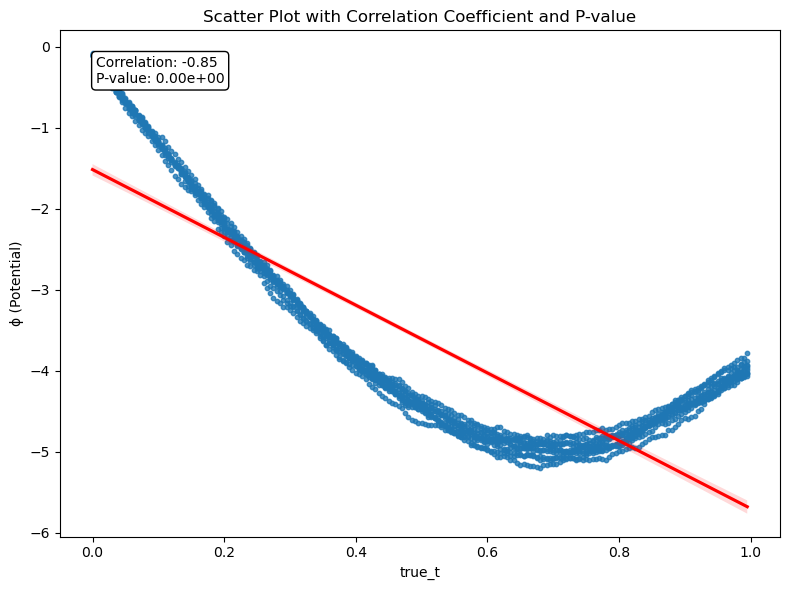

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Extract the specified columns from adata.obs
x = adata.obs["true_t"]
y = adata.obs["ϕ (Potential)"]

# Calculate the correlation coefficient and p-value
corr_coef, p_value = pearsonr(x, y)

# Create the scatter plot
plt.figure(figsize=(8, 6))
sns.regplot(x=x, y=y, scatter_kws={"s": 10}, line_kws={"color": "red"})

# Annotate with correlation coefficient and p-value
plt.annotate(f"Correlation: {corr_coef:.2f}\nP-value: {p_value:.2e}",
             xy=(0.05, 0.95), xycoords='axes fraction', ha='left', va='top',
             fontsize=10, bbox=dict(boxstyle="round", fc="w"))

# Add labels and title
plt.xlabel("true_t")
plt.ylabel("ϕ (Potential)")
plt.title("Scatter Plot with Correlation Coefficient and P-value")

# Show the plot
plt.tight_layout()
plt.show()

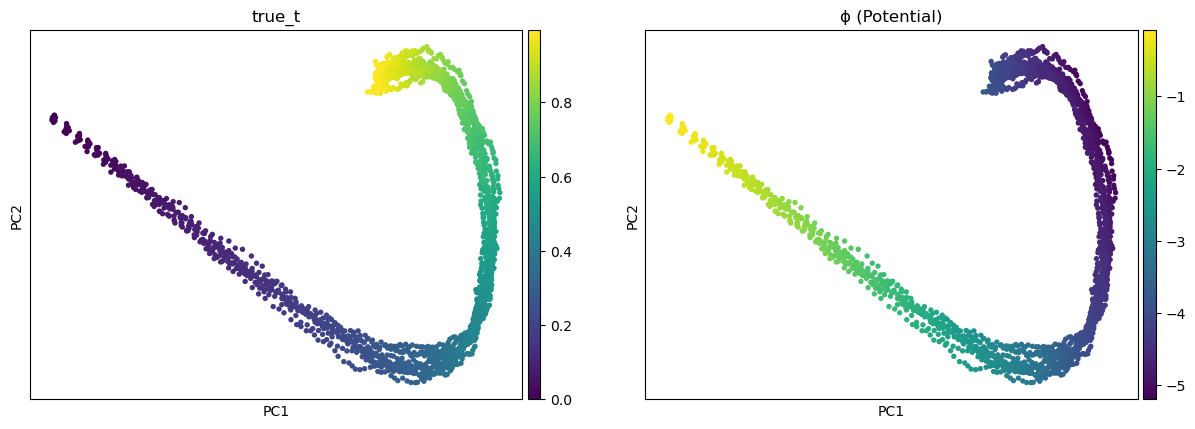

In [20]:
sc.pl.pca(adata, color=["true_t", "ϕ (Potential)"])

In [70]:
import plotly.express as px
import pandas as pd

# Prepare data for plotting
df = pd.DataFrame({
    "PCA1": adata.obsm["X_pca"][:, 0],
    "PCA2": adata.obsm["X_pca"][:, 1],
    "Value": adata.obs["wd"]  # Replace with your column name
})

# Create 3D scatter plot
fig = px.scatter_3d(
    df,
    x="PCA1", y="PCA2", z="Value",
    color="Value",  # Color by the numerical column
    color_continuous_scale="Viridis",  # Color map
    title="3D Plot: UMAP + Numerical Value"
)

fig.update_traces(marker=dict(size=1))  # Adjust marker size
fig.show()
